# 랜덤 포레스트(Random Forest)를 이용해서 내일 비가 올지 예측해보기 (Rain in Australia) - Outlier 제거로 성능 향상시켜 보기

# Outlier 제거
![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

# baseline 성능
3-5-1_Random_Forest로_내일_비가올지_예측해보기 (Rain in Australia).ipynb 
#### baseline - 랜덤 포레스트(Random Forest) 
#### accuracy : 0.85, precision : 0.87, recall 0.96, f1-score 0.91

# Kaggle 데이터 다운로드 

#### https://www.kaggle.com/jsphyg/weather-dataset-rattle-package



# 관련 라이브러리 import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 로딩 및 EDA

In [4]:
df = pd.read_csv('./data/weatherAUS.csv')
print(df.shape)

(21900, 23)


## 데이터 형상 파악하기

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9am       12162 non-null  float64
 18  Cloud3

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,21453.000000,21573.000000,21398.000000,7520.000000,4876.000000,18218.000000,21189.000000,20510.000000,21408.000000,20714.000000,18310.000000,18314.000000,12162.000000,11850.000000,21551.000000,20863.000000
mean,13.030634,24.226283,2.628391,6.146130,8.119032,37.645461,12.363585,16.595953,69.244021,51.306894,1018.240573,1015.593404,4.129666,4.342194,17.878061,22.730533
std,5.987940,6.320662,9.749826,5.262074,3.762443,13.118763,9.047347,9.193030,18.090502,21.436391,6.574577,6.502107,3.033737,2.756305,5.580146,6.157241
min,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.500000,19.500000,0.000000,3.000000,5.800000,28.000000,6.000000,9.000000,57.000000,35.000000,1013.800000,1011.200000,1.000000,1.000000,13.900000,18.100000
50%,13.500000,23.700000,0.000000,4.800000,9.300000,35.000000,11.000000,15.000000,70.000000,52.000000,1018.300000,1015.600000,4.000000,5.000000,18.300000,22.100000
75%,17.900000,28.200000,0.600000,8.000000,10.900000,44.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.000000,7.000000,7.000000,22.000000,26.600000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000


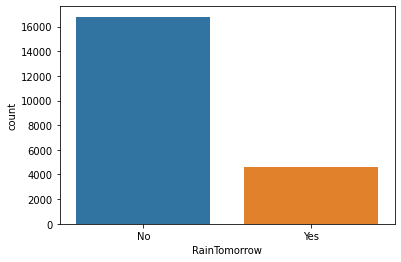

In [8]:
sns.countplot(x="RainTomorrow", data=df)

## 상관 분석(Correlation Analysis) 수행해보기

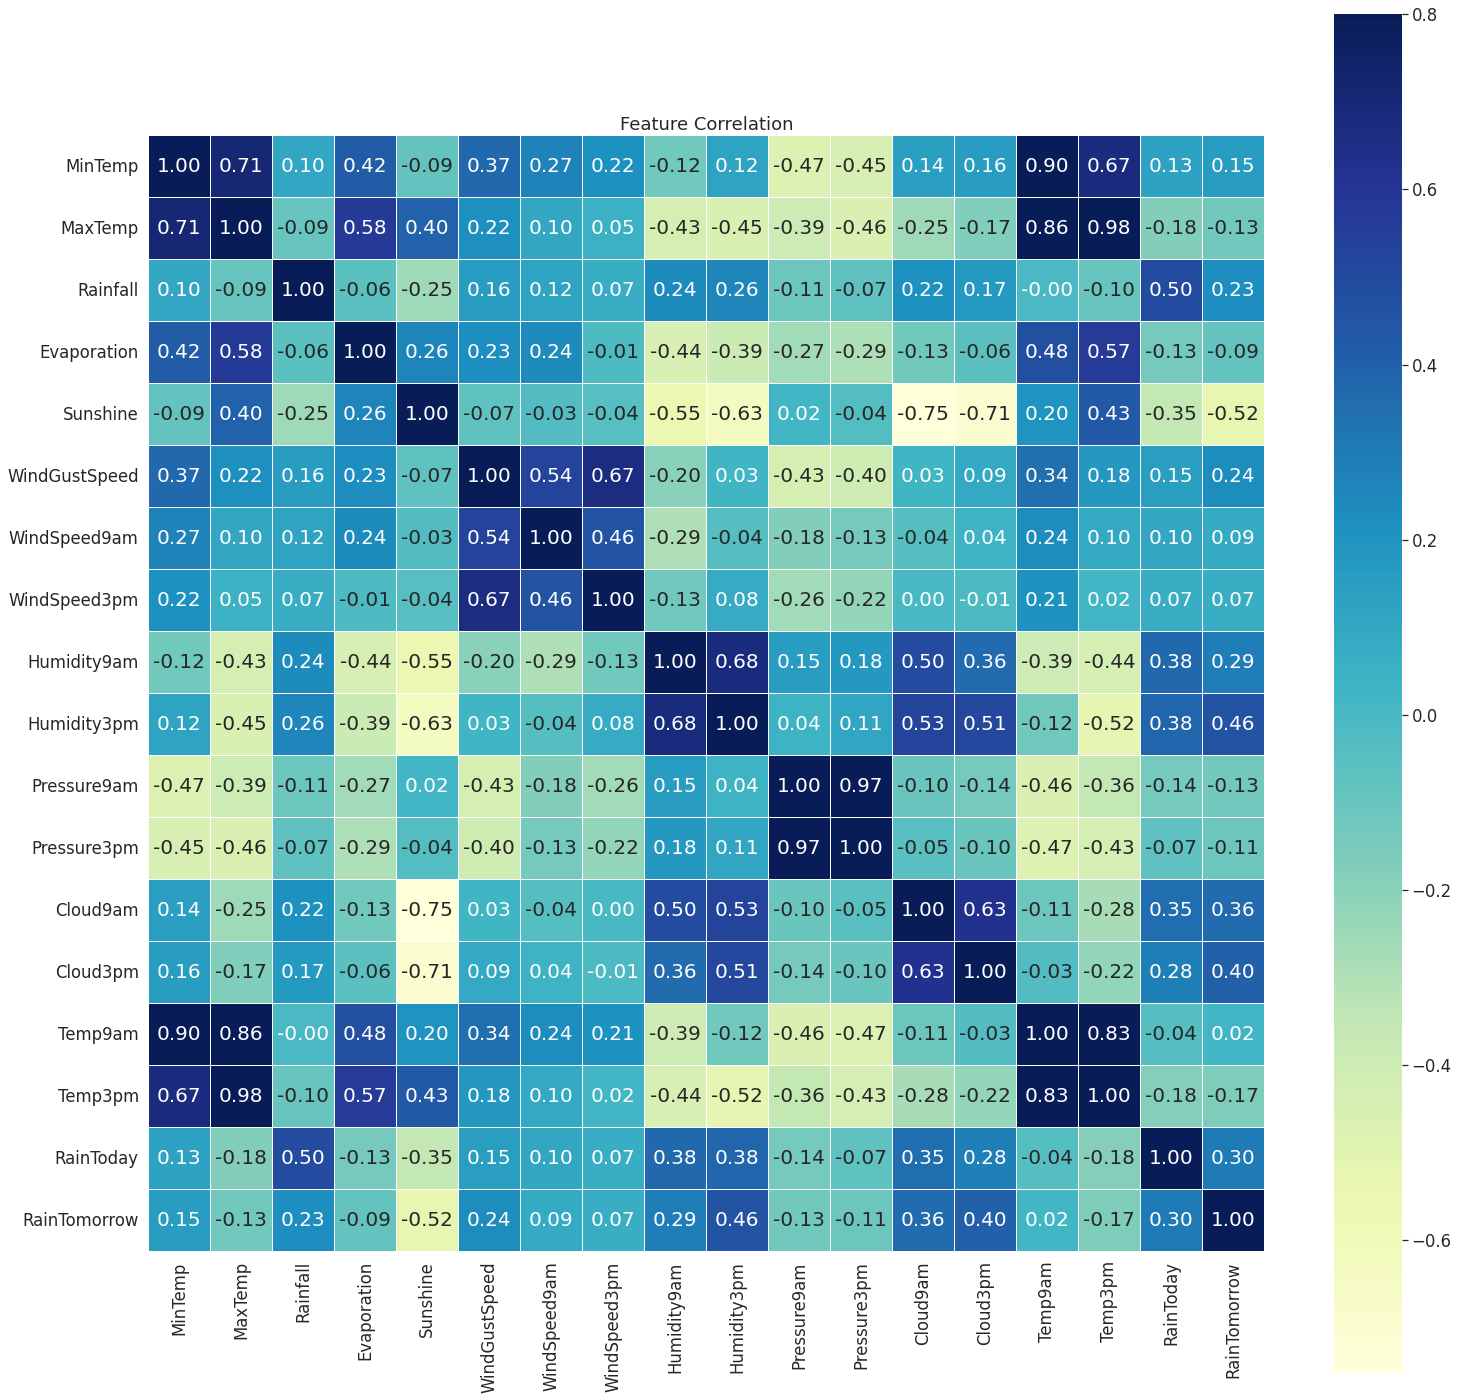

In [11]:
# Yes/No 값을 0, 1로 변경합니다.
temp_df = df.copy()
temp_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
temp_df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

corr = temp_df.corr()
plt.figure(figsize=(25, 25));
sns.set(font_scale=1.5); # plot의 글자크기 설정
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = '.2f', # annot의 출력 소숫점 자리 지정
            annot_kws={"size": 20},  # annot 글자크기
            cmap='YlGnBu');
plt.title('Feature Correlation');

## Outlier 분석

<AxesSubplot:ylabel='Sunshine'>

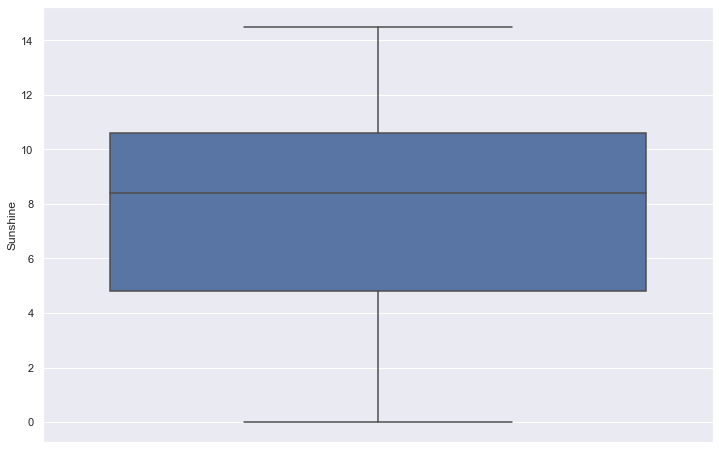

In [ ]:
sns.boxplot(data=df, y='Sunshine')

<AxesSubplot:ylabel='Cloud9am'>

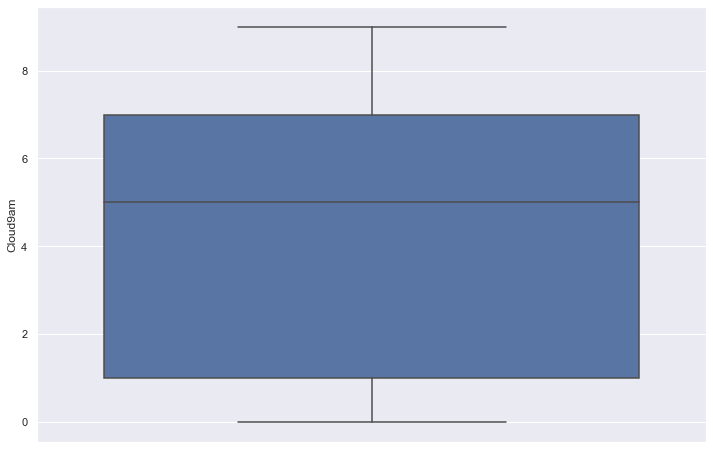

In [ ]:
sns.boxplot(data=df, y='Cloud9am')

<AxesSubplot:ylabel='Cloud3pm'>

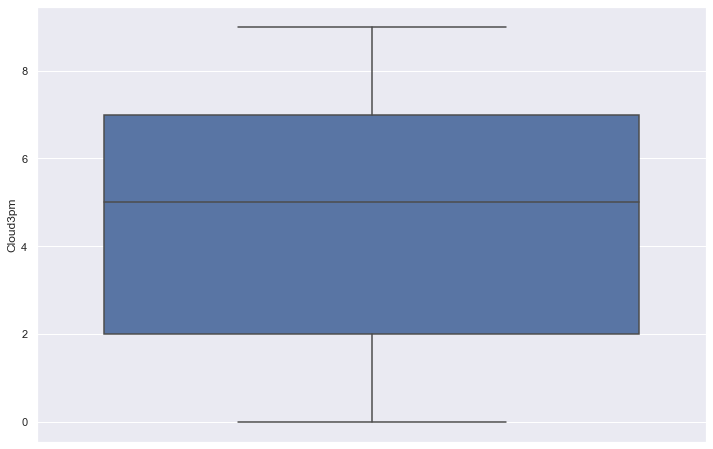

In [ ]:
sns.boxplot(data=df, y='Cloud3pm')

<AxesSubplot:ylabel='Pressure9am'>

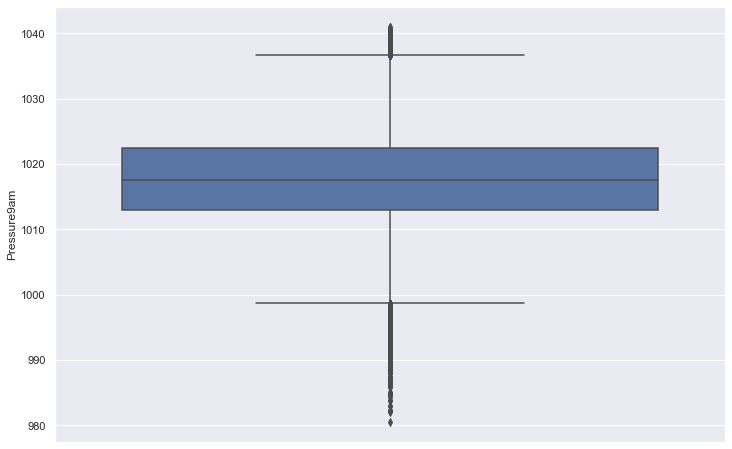

In [ ]:
sns.boxplot(data=df, y='Pressure9am')

<AxesSubplot:ylabel='Humidity9am'>

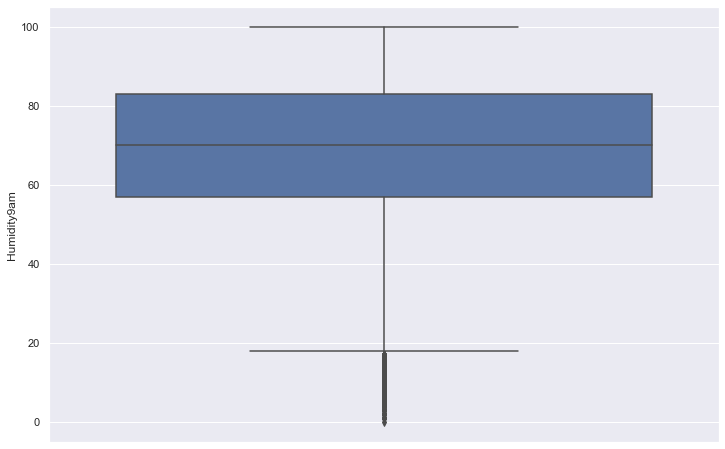

In [ ]:
sns.boxplot(data=df, y='Humidity9am')

<AxesSubplot:ylabel='Humidity3pm'>

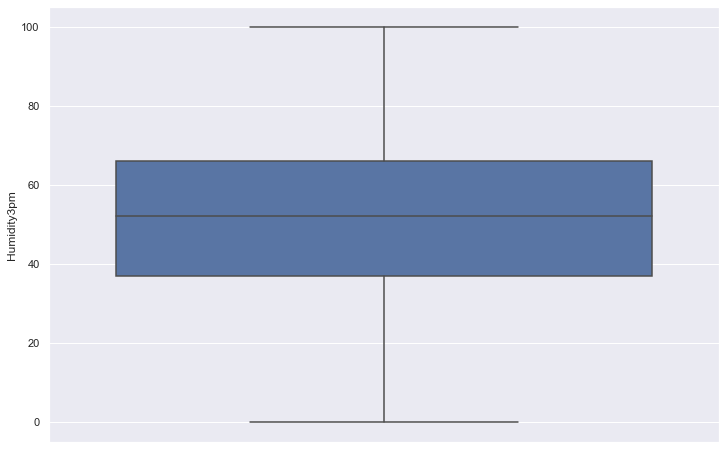

In [ ]:
# Humidity3pm
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=df, y='Humidity3pm')

<AxesSubplot:ylabel='Rainfall'>

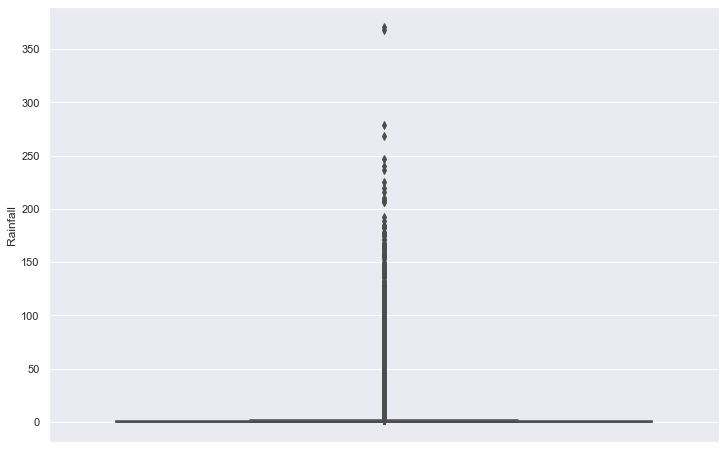

In [ ]:
sns.boxplot(data=df, y='Rainfall')

In [ ]:
df['Rainfall'].max()

371.0

In [ ]:
df['Rainfall'].mean()

2.360918149917032

In [ ]:
df['Rainfall'].median()

0.0

In [ ]:
df.shape

(145460, 23)

In [ ]:
filtered_rainfall = df.query('Rainfall != 0.0').copy()

In [ ]:
filtered_rainfall.shape

(54380, 23)

In [ ]:
filtered_rainfall.index

Int64Index([     0,      4,      5,      9,     11,     12,     13,     15,
                17,     18,
            ...
            145323, 145324, 145325, 145326, 145336, 145391, 145392, 145393,
            145394, 145429],
           dtype='int64', length=54380)

<AxesSubplot:ylabel='Rainfall'>

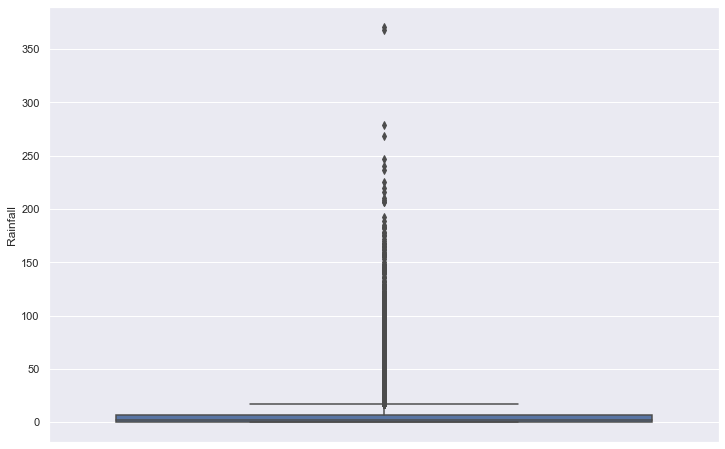

In [ ]:
sns.boxplot(data=filtered_rainfall, y='Rainfall')

<AxesSubplot:ylabel='Pressure3pm'>

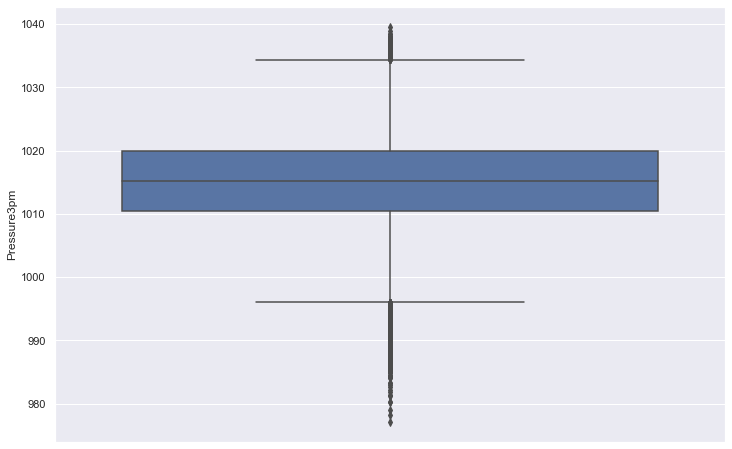

In [ ]:
sns.boxplot(data=df, y='Pressure3pm')

<AxesSubplot:ylabel='WindGustSpeed'>

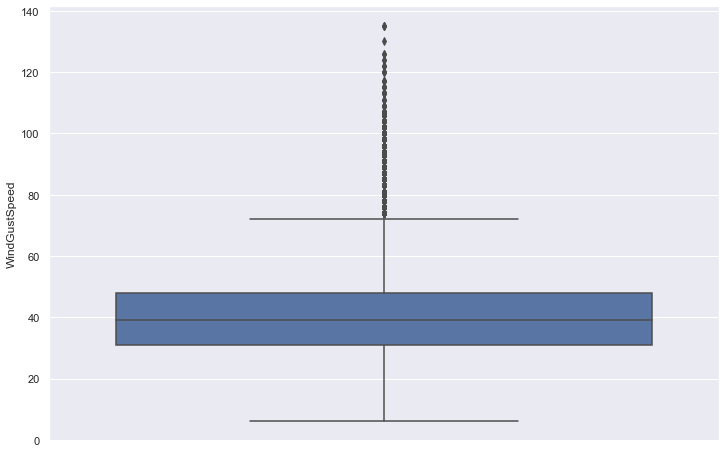

In [ ]:
sns.boxplot(data=df, y='WindGustSpeed')

In [ ]:
def get_outlier_indices(data, columns):
    outlier_indices = []
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 -Q1
        min_value = Q1 - 1.5*IQR
        max_value = Q3 + 1.5*IQR
        filter = ((data[column] < min_value) | (data[column] > max_value))
        
        outlier_data = data[column][filter]
        outlier_index = outlier_data.index
        outlier_indices.extend(outlier_index)

    return outlier_indices

In [ ]:
print('dataframe before removing outlier (Rainfall column) :', df.shape)
delete_indices = get_outlier_indices(filtered_rainfall, ['Rainfall'])
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (Rainfall column) :', df.shape)

dataframe before removing outlier (Rainfall column) : (145460, 23)
dataframe after removing outlier (Rainfall column) : (140240, 23)


In [ ]:
print('dataframe before removing outlier (etc) :', df.shape)
delete_indices = get_outlier_indices(df, ['Humidity9am', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed'])
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (etc) :', df.shape)

dataframe before removing outlier (etc) : (140240, 23)
dataframe after removing outlier (etc) : (135169, 23)


# 결측치(null값) 확인하기

In [ ]:
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008863
MinTemp          0.010505
Temp9am          0.012177
WindSpeed9am     0.012525
Humidity9am      0.018325
WindSpeed3pm     0.021543
RainTomorrow     0.022698
Rainfall         0.023297
RainToday        0.023297
Temp3pm          0.024969
WindDir3pm       0.029622
Humidity3pm      0.031205
WindGustSpeed    0.072184
WindGustDir      0.072613
WindDir9am       0.075239
Pressure3pm      0.104447
Pressure9am      0.104773
Cloud9am         0.387419
Cloud3pm         0.411847
Evaporation      0.431711
Sunshine         0.482367
dtype: float64

## categorical column 확인하기

In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'object']
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## numerical column 확인하기

In [ ]:
numerical = [col for col in df.columns if df[col].dtypes != 'object']
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# 결측치 개수 확인하기

In [ ]:
# categorical column의 null 비율
df[categorical].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainTomorrow    0.022698
RainToday       0.023297
WindDir3pm      0.029622
WindGustDir     0.072613
WindDir9am      0.075239
dtype: float64

In [ ]:
# numerical column의 null 비율
df[numerical].isnull().mean().sort_values()

MaxTemp          0.008863
MinTemp          0.010505
Temp9am          0.012177
WindSpeed9am     0.012525
Humidity9am      0.018325
WindSpeed3pm     0.021543
Rainfall         0.023297
Temp3pm          0.024969
Humidity3pm      0.031205
WindGustSpeed    0.072184
Pressure3pm      0.104447
Pressure9am      0.104773
Cloud9am         0.387419
Cloud3pm         0.411847
Evaporation      0.431711
Sunshine         0.482367
dtype: float64

In [ ]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치를 채움
for col in numerical:
    if df[col].isnull().mean()>0:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)

In [ ]:
for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.07261280323151019
WindDir9am 0.0752391450702454
WindDir3pm 0.02962217668252336
RainToday 0.02329676183148503
RainTomorrow 0.022697512003491925


In [ ]:
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# 날짜 column을 drop합니다.
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.isnull().mean().sort_values()

Location         0.000000
Temp3pm          0.000000
Temp9am          0.000000
Cloud3pm         0.000000
Cloud9am         0.000000
Pressure3pm      0.000000
Pressure9am      0.000000
Humidity3pm      0.000000
Humidity9am      0.000000
WindSpeed3pm     0.000000
WindSpeed9am     0.000000
WindDir3pm       0.000000
WindDir9am       0.000000
WindGustSpeed    0.000000
WindGustDir      0.000000
Sunshine         0.000000
Evaporation      0.000000
Rainfall         0.000000
MaxTemp          0.000000
MinTemp          0.000000
RainToday        0.000000
RainTomorrow     0.022698
dtype: float64

## RainTomorrow가 null인 row들 삭제함.

In [ ]:
df.shape

(135169, 22)

In [ ]:
#df.dropna(how='any', inplace=True)
df.dropna(subset=['RainTomorrow'], inplace=True)
df['RainTomorrow']

In [ ]:
df.shape

(132101, 22)

# Yes/No 값에 대한 변환

In [ ]:
# Yes/No 값을 0, 1로 변경하기
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

## categorical value에 one-hot encoding 적용하기

In [ ]:
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(132101, 115)

# 트레이닝 데이터 준비

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135163,3.5,21.8,0.0,4.6,8.6,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
135164,2.8,23.4,0.0,4.6,8.6,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
135165,3.6,25.3,0.0,4.6,8.6,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
135166,5.4,26.9,0.0,4.6,8.6,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
135163    0
135164    0
135165    0
135166    0
135167    0
Name: RainTomorrow, Length: 132101, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 랜덤 포레스트(Random Forest)로 내일 비가 올지 안올지 예측해보기

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('랜덤 포레스트(Random Forest) Accuracy (After removing Outlier):', score)

랜덤 포레스트(Random Forest) Accuracy (After removing Outlier): 0.8590893607357784


In [ ]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     21050
           1       0.76      0.45      0.56      5371

    accuracy                           0.86     26421
   macro avg       0.82      0.71      0.74     26421
weighted avg       0.85      0.86      0.84     26421

